<a href="https://colab.research.google.com/github/eunzzae/PJT_C.lab/blob/main/240717_%EC%BB%A4%EB%84%A5%EC%B8%A0%EB%9E%A9_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns

font_list = [font.name for font in fm.fontManager.ttflist]
font_list.sort()
font_list
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 51.5 MB/s eta 0:00:00


In [ ]:
import konlpy
from konlpy.tag import Okt
import re
from collections import Counter
from wordcloud import WordCloud

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string

In [ ]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/data/connects_lab/')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Colab Notebooks/data/connects_lab'

In [ ]:
# Data read
pd.set_option('display.max_columns', 500)
bath = '/content/drive/MyDrive/Colab Notebooks/data/connects_lab/'
cus_df = pd.read_excel(bath+'Customer_Data_ori.xlsx')
map_df = pd.read_csv(bath+'course_data_0124.csv')

## Session 0

### Data 확인
---

In [ ]:
# Data shape
# cus_df (50000rows, 14cols)
# map_df (32rows, 18col)
print(f'cus_df shape : {cus_df.shape}')
print(f'map_df shape : {map_df.shape}')

cus_df shape : (50000, 14)
map_df shape : (32, 18)


In [ ]:
# Data type
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    50000 non-null  object 
 1   Age                     50000 non-null  int64  
 2   Child_Age_Months        50000 non-null  int64  
 3   Number_of_Children      50000 non-null  int64  
 4   Gender                  50000 non-null  object 
 5   Child_1_Gender          50000 non-null  object 
 6   Child_2_Gender          14957 non-null  object 
 7   Child_3_Gender          2474 non-null   object 
 8   Parenting_Concerns      50000 non-null  object 
 9   Parenting_Stress_Level  50000 non-null  int64  
 10  Parenting_Letter        50000 non-null  object 
 11  Child_1_Age_Months      50000 non-null  int64  
 12  Child_2_Age_Months      14957 non-null  float64
 13  Child_3_Age_Months      2474 non-null   float64
dtypes: float64(2), int64(5), object(7)
mem

In [ ]:
map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   일련번호         32 non-null     int64 
 1   주제    구분     32 non-null     object
 2   내용구분         32 non-null     object
 3   시기           32 non-null     object
 4   시기_2         32 non-null     object
 5   코스 명         32 non-null     object
 6   3T           32 non-null     int64 
 7   NVC          32 non-null     int64 
 8   육아정보         32 non-null     int64 
 9   양육자Only      6 non-null      object
 10  추천태그         32 non-null     object
 11  관련 육아고민      32 non-null     object
 12  세부내용         15 non-null     object
 13  기간(week)     32 non-null     int64 
 14  Score_3T     32 non-null     int64 
 15  Score_NVC    32 non-null     int64 
 16  Score_육아정보   32 non-null     int64 
 17  Total_Score  32 non-null     int64 
dtypes: int64(9), object(9)
memory usage: 4.6+ KB


In [ ]:
# Null 확인
map_df.isnull().sum()

일련번호            0
주제    구분        0
내용구분            0
시기              0
시기_2            0
코스 명            0
3T              0
NVC             0
육아정보            0
양육자Only        26
추천태그            0
관련 육아고민         0
세부내용           17
기간(week)        0
Score_3T        0
Score_NVC       0
Score_육아정보      0
Total_Score     0
dtype: int64

In [ ]:
# Outlier 확인
map_df.describe()

,일련번호,3T,NVC,육아정보,기간(week),Score_3T,Score_NVC,Score_육아정보,Total_Score
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,16.500000,1.937500,6.343750,1.781250,1.656250,2.562500,4.750000,5.437500,12.750000
std,9.380832,1.758619,1.770901,0.750672,0.482559,1.293595,1.367833,1.812813,4.119192
min,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,2.000000,2.000000,5.000000
25%,8.750000,1.000000,5.000000,1.000000,1.000000,2.000000,3.000000,4.750000,9.750000
50%,16.500000,1.500000,6.500000,2.000000,2.000000,3.000000,5.000000,6.000000,14.000000
75%,24.250000,3.000000,7.250000,2.000000,2.000000,3.000000,6.000000,7.000000,16.000000
max,32.000000,6.000000,10.000000,3.000000,2.000000,5.000000,7.000000,8.000000,20.000000


### 데이터 전처리
---

### cus_df
---

#### 고객id 컬럼 생성

In [ ]:
import random
import string

# 무작위 고객 ID 생성 함수
def generate_random_id(length=8, randomstate=42):
    letters_and_digits = string.ascii_letters + string.digits
    return ''.join(random.choice(letters_and_digits) for i in range(length))

# 고객 id 컬럼 생성
cus_df['고객id'] = [generate_random_id() for _ in range(len(cus_df))]

# 고객id 컬럼을 Name 컬럼 앞에 위치시키기
cols = cus_df.columns.tolist()
cols.insert(cols.index('Name'), cols.pop(cols.index('고객id')))
cus_df = cus_df[cols]

#### Parenting_Concerns

In [ ]:
# cus_df의 Parenting_Concerns 컬럼 전처리
cus_df['Parenting_Concerns'] = cus_df['Parenting_Concerns'].str.strip("[]").str.replace("'", "").str.replace(".", ",")

#### 텍스트 전처리



In [ ]:
okt = Okt()

In [ ]:
def preprocess_text(text):
    # 대괄호로 묶인 내용 제거
    text = re.sub(r'\[.*?\]', '', text)
    # 특수문자 제거
    text = re.sub(r'\W+', ' ', text)
    # 불용어 제거
    stopwords = ['의', '세', '저', '제', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

# 'Parenting_Letter' 열에 함수 적용
cus_df['Parenting_Letter'] = cus_df['Parenting_Letter'].apply(preprocess_text)

# 형태소 분석기를 사용하여 명사 추출
cus_df['Nouns'] = cus_df['Parenting_Letter'].apply(lambda x: okt.nouns(x))

In [ ]:
def preprocess_text(word_list):
    # 불용어 리스트
    stopwords = ['의', '세', '저', '제', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']
    # 불용어 제거
    return [word for word in word_list if word not in stopwords]

# 'Nouns' 열에 함수 적용
cus_df['Nouns'] = cus_df['Nouns'].apply(preprocess_text)

# 모든 명사를 하나의 리스트로 합침
all_nouns = [noun for sublist in cus_df['Nouns'] for noun in sublist]

* 단어 빈도

In [ ]:
# 단어 빈도 계산
word_counts = Counter(all_nouns)

# 가장 많이 등장한 단어 20개 출력
print(word_counts.most_common(100))

[('아이', 82017), ('육아', 66718), ('고민', 66718), ('엄마', 44913), ('방법', 41101), ('글', 33429), ('도움', 33297), ('어려움', 30337), ('양육', 30280), ('개선', 27393), ('알', 27334), ('자주', 27330), ('발달', 27260), ('직면', 16794), ('귀하', 16748), ('경험', 16748), ('공유', 16748), ('대한', 16718), ('통해', 16711), ('구', 16711), ('조언', 16666), ('구합', 16666), ('니', 16666), ('상황', 16615), ('매우', 16615), ('만듭니', 16615), ('주시', 16586), ('관계', 13767), ('더', 13767), ('나은', 13767), ('의사소통', 13767), ('편식', 13747), ('식단', 13747), ('거부', 13747), ('영양', 13747), ('상태', 13747), ('걱정', 13747), ('면역', 13704), ('건강', 13704), ('관리', 13704), ('단계', 13630), ('평균', 13630), ('것', 13630), ('밤', 13626), ('낮잠', 13626), ('거의', 13626), ('자지', 13626), ('수면', 13626), ('패턴', 13626), ('감정', 13543), ('조절', 13543), ('지원', 13543), ('연속', 13486), ('책임', 13486), ('스트레스', 13486), ('자신', 13486), ('시간', 13486), ('아빠', 5087)]


* 단어 시각화

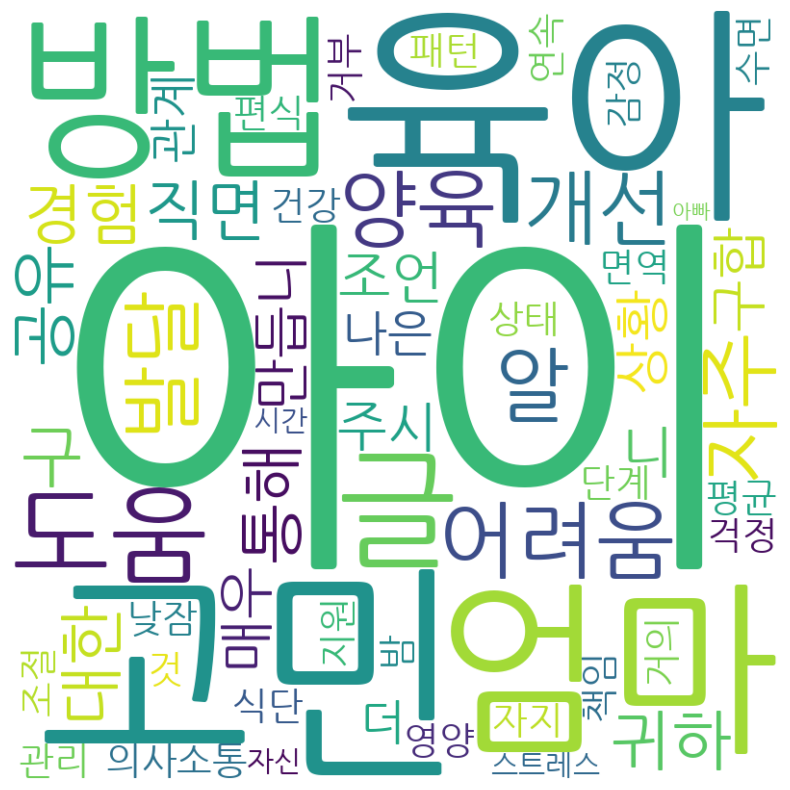

In [ ]:
# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='NanumGothic.ttf',  # 한글 폰트 경로
    width=800,
    height=800,
    background_color='white'
).generate_from_frequencies(word_counts)

# 워드클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* 데이터 분포

단어의 최대 길이 :  4
단어의 평균 길이 :  1.9715854485123774


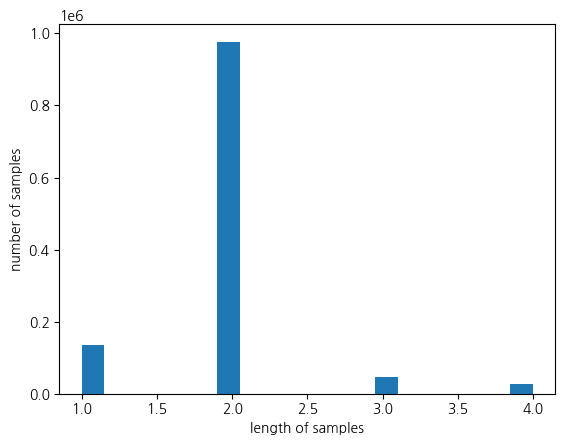

In [ ]:
print('단어의 최대 길이 : ', max(len(concern) for concern in all_nouns))
print('단어의 평균 길이 : ', sum(map(len, all_nouns))/len(all_nouns))
plt.hist([len(concern) for concern in all_nouns], bins=20)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### map_df
---

#### 시기


In [ ]:
new_data = {'일련번호':list(range(1, 33))
            ,'시기별': ['0,72', '0,24', '22,27', '34,39', '45,48', '13,24','25,36','37,48','0,36',
                     '37,72','0,72','0,36','37,72','0,72','0,1','0,12','13,72','12,35','24,47','48,72','0,12',
                     '24,47','47,72','0,24','25,35','36,47','25,36','36,72','24,72','24,72','24,72','0,72']}

temp_df = pd.DataFrame(new_data)

map_df = pd.merge(map_df, temp_df,on='일련번호')

In [ ]:
map_df.columns

Index(['일련번호', '주제    구분', '내용구분', '시기', '시기_2', '코스 명', '3T', 'NVC', '육아정보',
       '양육자Only', '추천태그', '관련 육아고민', '세부내용', '기간(week)', 'Score_3T',
       'Score_NVC', 'Score_육아정보', 'Total_Score', '시기별'],
      dtype='object')

In [ ]:
# 원하는 순서대로 컬럼명을 나열
new_column_order = [
    '일련번호', '주제    구분', '내용구분', '시기별','시기', '시기_2', '코스 명', '3T', 'NVC', '육아정보',
       '양육자Only', '추천태그', '관련 육아고민', '세부내용', '기간(week)', 'Score_3T',
       'Score_NVC', 'Score_육아정보', 'Total_Score'
]

# 컬럼 순서를 변경하여 데이터프레임 재정렬
map_df = map_df[new_column_order]

In [ ]:
# 불필요한 컬럼 드랍
map_df.drop(['주제    구분','3T', 'NVC', '육아정보','시기', '시기_2',
       '양육자Only','기간(week)', 'Score_3T',
       'Score_NVC', 'Score_육아정보', 'Total_Score'], axis=1, inplace=True)

#### 피처 추출

In [ ]:
selected_features = ['추천태그','관련 육아고민',	'세부내용']
print(selected_features)

['추천태그', '관련 육아고민', '세부내용']


In [ ]:
# null 값 대체
for feature in selected_features:
  map_df[feature] = map_df[feature].fillna('')

In [ ]:
# selected featurea 결합
combined_features = map_df['추천태그'] + ' ' + map_df['관련 육아고민'] + ' ' + map_df['세부내용']
combined_features

0           입문,기초,필수 육아관, 관계, 발달, 상호작용 (3T/NVC기초) + 육아관
1     생애초기, 기초,언어자극,상호작용  육아관, 육아방법, 상호작용, 관계, 발달, 부...
2     24개월, 두돌, 두살, 발달사항, 싫어, 왜요 육아관, 육아방법, 상호작용, 발달...
3     36개월, 세돌, 세살, 발달사항, 미운네살, 싫어 육아관, 육아방법, 상호작용, ...
4     48개월, 네돌, 발달사항, 졸업 육아관, 육아방법, 상호작용, 발달, 감정표현, ...
5     등하원, 분리불안, 애착, 기관, 1세, 한살, 어린이집 육아방법, 상호작용, 발달...
6     등하원, 분리불안, 애착, 기관, 2세, 어린이집, 유치원 육아방법, 상호작용, 발...
7     등하원, 분리불안, 애착, 기관, 3세, 어린이집, 유치원 육아방법, 상호작용, 발...
8     놀이터, 훈육, 거절, 약속, 경계설정, 생활습관 육아관, 육아방법, 부모역할, 관...
9     놀이터, 훈육, 거절, 약속, 경계설정, 생활습관 육아관, 육아방법, 부모역할, 관...
10     알아차림, 마음챙김, 자기연결, 자기돌봄, 육아우울증 감정표현, 육아스트레스, 우울감 
11    부부관계, 육아관, 부부대화, 육아대화, 육아분담, 가사분담 육아관, 부부관계, 육...
12    부부관계, 육아관, 부부대화, 육아대화, 사교육, 훈육, 교육관 육아관, 부부관계,...
13                  산후우울, 육아번아웃, 자기돌봄 육아관, 육아스트레스, 우울감 
14                태담, 느낌, 감정표현, 자기공감, 대화법 발달, 상호작용, 관계 
15        느낌, 감정표현, 자기공감,대화법 육아관, 육아방법, 부모역할, 관계, 감정표현 
16    느낌, 감정표현, 자기공감,대화법 육아관, 육아방법, 부모역할, 관계, 감정표현 더...
17    훈육, 떼쓰기, 공격성, 훈육상황, 경계설정 육아관, 육아방법, 관계, 발달

In [ ]:
features = map_df['추천태그'] + ' ' + map_df['관련 육아고민']
features

0                            입문,기초,필수 육아관, 관계, 발달, 상호작용
1     생애초기, 기초,언어자극,상호작용  육아관, 육아방법, 상호작용, 관계, 발달, 부...
2     24개월, 두돌, 두살, 발달사항, 싫어, 왜요 육아관, 육아방법, 상호작용, 발달...
3     36개월, 세돌, 세살, 발달사항, 미운네살, 싫어 육아관, 육아방법, 상호작용, ...
4     48개월, 네돌, 발달사항, 졸업 육아관, 육아방법, 상호작용, 발달, 감정표현, ...
5     등하원, 분리불안, 애착, 기관, 1세, 한살, 어린이집 육아방법, 상호작용, 발달...
6     등하원, 분리불안, 애착, 기관, 2세, 어린이집, 유치원 육아방법, 상호작용, 발...
7     등하원, 분리불안, 애착, 기관, 3세, 어린이집, 유치원 육아방법, 상호작용, 발...
8     놀이터, 훈육, 거절, 약속, 경계설정, 생활습관 육아관, 육아방법, 부모역할, 관...
9     놀이터, 훈육, 거절, 약속, 경계설정, 생활습관 육아관, 육아방법, 부모역할, 관...
10      알아차림, 마음챙김, 자기연결, 자기돌봄, 육아우울증 감정표현, 육아스트레스, 우울감
11    부부관계, 육아관, 부부대화, 육아대화, 육아분담, 가사분담 육아관, 부부관계, 육...
12    부부관계, 육아관, 부부대화, 육아대화, 사교육, 훈육, 교육관 육아관, 부부관계,...
13                   산후우울, 육아번아웃, 자기돌봄 육아관, 육아스트레스, 우울감
14                 태담, 느낌, 감정표현, 자기공감, 대화법 발달, 상호작용, 관계
15         느낌, 감정표현, 자기공감,대화법 육아관, 육아방법, 부모역할, 관계, 감정표현
16         느낌, 감정표현, 자기공감,대화법 육아관, 육아방법, 부모역할, 관계, 감정표현
17    훈육, 떼쓰기, 공격성, 훈육상황, 경계설정 육아관, 육아방법, 관계, 발달

In [ ]:
# 단어 분리 및 집합 생성
unique_words = set()
for entry in list(features):
    words = entry.split(',')
    for word in words:
        unique_words.add(word.strip())

In [ ]:
# 고유 단어 수 확인
print(f'고유한 단어 수: {len(unique_words)}')
print(unique_words)

고유한 단어 수: 111
{'대화법', '산후우울', '생활습관', '경계설정 육아관', '옷정리', '조동엄마', '태블릿', '이유식 육아관', '육아번아웃', '갈등중재', '칭찬', '두살', '유치원 육아방법', '생활습관 육아관', '싫어', '초보부모', '초보부모 육아관', '상호작용  육아관', '양치 육아관', '자기돌봄 육아관', '언어자극', '거절', '대화법 육아관', '장난감 정리 육아관', '형제', '부부관계', '경계설정', '초점책', '샤워', '시터', '육아대화', '생애초기', '육아관', '휴대전화', '어른대화', '미디어', '아들딸', '쌍둥이', '싸움 육아관', '배변', '어린이집 육아방법', '남매', '디지털 육아관', '디지털', '놀이터', '선생님', '육아방법', '태담', '훈육상황', '세돌', '느낌', '육아분담', '필수 육아관', '24개월', '자기연결', '육아스트레스', '우울감', '싫어 육아관', '놀이', '마음챙김', '한살', '공격성', '분리불안', '애착', '식습관', '그만봐', '부모역할', '사교육', '상호작용', '발달사항', '2세', '어린이집', '기초', '자기공감', '부부대화', '졸업 육아관', '집안일', '왜요 육아관', '미운네살', '양육자', '등하원', '알아차림', '가사분담 육아관', '발달. 관계', '연년생', '네돌', '감정표현', '교육관 육아관', '건강', '48개월', '돌 전', '세살', '수면', '공감 육아방법', '자기돌봄', '발달', '1세', '관계', '육아우울증 감정표현', '대화법 발달', '감사', '갈등중재 육아관', '떼쓰기', '입문', '두돌', '훈육', '기관', '약속', '중독 육아관', '36개월', '3세'}


In [ ]:
'대화법', '산후우울', '생활습관', '경계설정 육아관', '옷정리', '조동엄마', '태블릿', '이유식 육아관', '육아번아웃',
'갈등중재', '칭찬', '두살', '유치원 육아방법', '생활습관 육아관', '싫어', '초보부모', '초보부모 육아관', '상호작용  육아관',
'양치 육아관', '자기돌봄 육아관', '언어자극', '거절', '대화법 육아관', '장난감 정리 육아관', '형제', '부부관계', '경계설정',
'초점책', '샤워', '시터', '육아대화', '생애초기', '육아관', '휴대전화', '어른대화', '미디어', '아들딸', '쌍둥이', '싸움 육아관',
'배변', '어린이집 육아방법', '남매', '디지털 육아관', '디지털', '놀이터', '선생님', '육아방법', '태담', '훈육상황', '세돌', '느낌',
'육아분담', '필수 육아관', '24개월', '자기연결', '육아스트레스', '우울감', '싫어 육아관', '놀이', '마음챙김', '한살', '공격성', '분리불안',
'애착', '식습관', '그만봐', '부모역할', '사교육', '상호작용', '발달사항', '2세', '어린이집', '기초', '자기공감', '부부대화', '졸업 육아관',
'집안일', '왜요 육아관', '미운네살', '양육자', '등하원', '알아차림', '가사분담 육아관', '발달. 관계', '연년생', '네돌', '감정표현', '교육관 육아관',
'건강', '48개월', '돌 전', '세살', '수면', '공감 육아방법', '자기돌봄', '발달', '1세', '관계', '육아우울증 감정표현', '대화법 발달',
'감사', '갈등중재 육아관', '떼쓰기', '입문', '두돌', '훈육', '기관', '약속', '중독 육아관', '36개월', '3세'

#### 텍스트 전처리

In [ ]:
def preprocess_text(text):
    # 대괄호로 묶인 내용 제거
    text = re.sub(r'\[/,()+.*?\]', '', text)
    # 특수문자 제거
    text = re.sub(r'\W+', ' ', text)
    # 불용어 제거
    stopwords = ['의', '세', '저', '제', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

# combined_features 에 함수 적용
combined_features = combined_features.apply(preprocess_text)

# 형태소 분석기를 사용하여 명사 추출
nouns = combined_features.apply(lambda x: okt.nouns(x))

# 모든 명사를 하나의 리스트로 합침
all_nouns = [noun for sublist in nouns for noun in sublist]

* 단어 빈도

In [ ]:
# 단어 빈도 계산
word_counts = Counter((all_nouns))

# 가장 많이 등장한 단어 20개 출력
print(word_counts.most_common(20))

[('육아', 63), ('발달', 32), ('관', 30), ('상호작용', 29), ('방법', 29), ('관계', 26), ('부모', 25), ('역할', 22), ('훈육', 21), ('감정', 14), ('표현', 13), ('놀이', 11), ('돌', 9), ('해당', 8), ('기간', 8), ('살', 6), ('사항', 6), ('습관', 6), ('자기', 6), ('부부', 6)]


* 단어 시각화

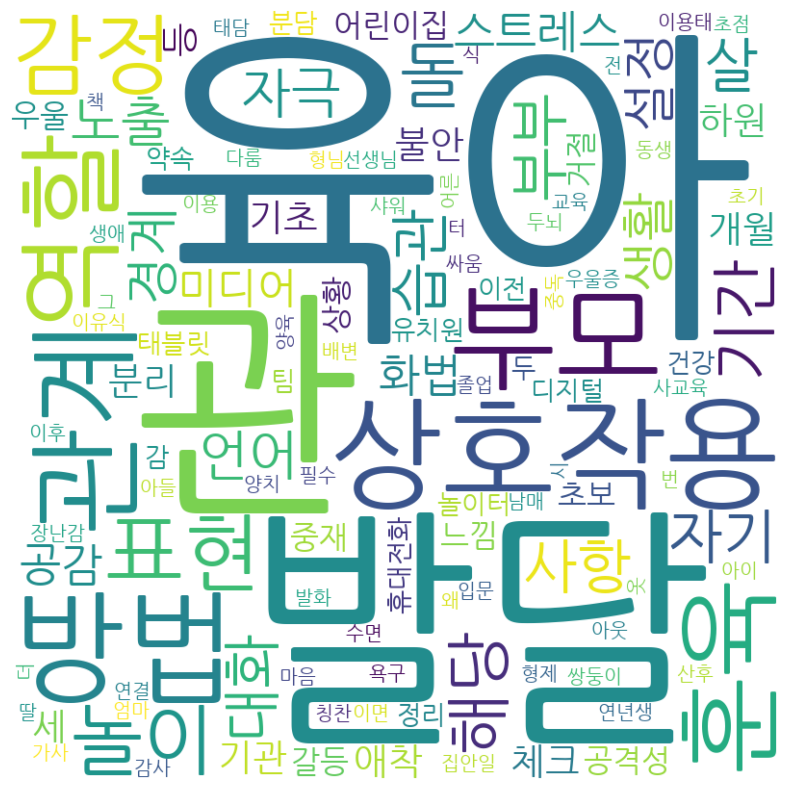

In [ ]:
# 워드클라우드 생성
wordcloud = WordCloud(
    font_path='NanumGothic.ttf',  # 한글 폰트 경로
    width=800,
    height=800,
    background_color='white'
).generate_from_frequencies(word_counts)

# 워드클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

*  데이터 분포

단어의 최대 길이 :  4
단어의 평균 길이 :  2.0569395017793592


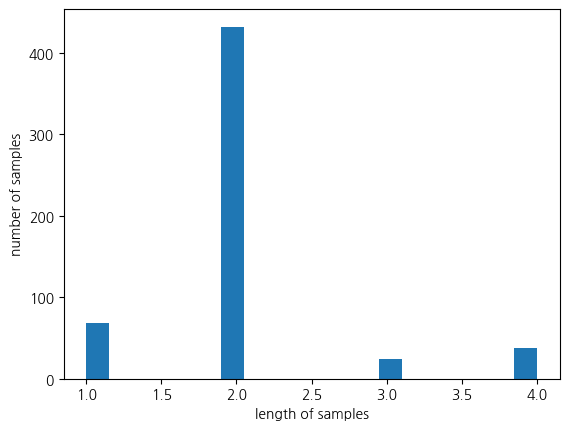

In [ ]:
print('단어의 최대 길이 : ', max(len(concern) for concern in all_nouns))
print('단어의 평균 길이 : ', sum(map(len, all_nouns))/len(all_nouns))
plt.hist([len(concern) for concern in all_nouns], bins=20)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## Session 1
## Content-Based 추천시스템

### TFIDF Vectorization
---

In [ ]:
# Combine relevant features
map_df['combined_features'] = map_df['추천태그'] + ' ' + map_df['관련 육아고민'] + ' ' + map_df['세부내용']

# Apply preprocessing
map_df['combined_features'] = map_df['combined_features'].apply(preprocess_text)

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
feature_vectors = tfidf_vectorizer.fit_transform(map_df['combined_features'])

In [ ]:
print(feature_vectors)

  (0, 9)	0.42381204949411344
  (0, 6)	0.42381204949411344
  (0, 59)	0.15661230814467608
  (0, 48)	0.13799731326991102
  (0, 20)	0.15165900614012598
  (0, 89)	0.2675837455561073
  (0, 118)	0.42381204949411344
  (0, 25)	0.37863068847233333
  (0, 101)	0.42381204949411344
  (1, 51)	0.23154681790923695
  (1, 99)	0.3050345508138777
  (1, 50)	0.3050345508138777
  (1, 73)	0.3050345508138777
  (1, 36)	0.3050345508138777
  (1, 82)	0.3050345508138777
  (1, 66)	0.3050345508138777
  (1, 53)	0.10915507680834591
  (1, 91)	0.09932220784438538
  (1, 81)	0.23154681790923695
  (1, 60)	0.3050345508138777
  (1, 59)	0.3381605015043307
  (1, 48)	0.09932220784438538
  (1, 20)	0.10915507680834591
  (1, 89)	0.09629538344677932
  (1, 25)	0.2725157109628419
  :	:
  (29, 124)	0.17701579912928728
  (29, 53)	0.12970515217831832
  (29, 91)	0.11802109860416107
  (29, 59)	0.13394142410595927
  (29, 48)	0.11802109860416107
  (29, 20)	0.12970515217831832
  (29, 89)	0.11442442925457272
  (30, 114)	0.5521096465789087
  (30

### Cosine Similarity
---

In [ ]:
# 코사인 유사도 점수화
similarity = cosine_similarity(feature_vectors, feature_vectors)

In [ ]:
print(similarity)

[[1.         0.21217054 0.06684463 ... 0.08755254 0.1333619  0.08004856]
 [0.21217054 1.         0.15264527 ... 0.10807243 0.16461823 0.07915477]
 [0.06684463 0.15264527 1.         ... 0.07045283 0.10731525 0.04138099]
 ...
 [0.08755254 0.10807243 0.07045283 ... 1.         0.14095596 0.15243721]
 [0.1333619  0.16461823 0.10731525 ... 0.14095596 1.         0.08187986]
 [0.08004856 0.07915477 0.04138099 ... 0.15243721 0.08187986 1.        ]]


In [ ]:
# 모든 코스의 리스트 생성
list_of_all = map_df['코스 명'].tolist()
print(list_of_all)

['첫걸음', '생애초기 (intro)', '두돌 ', '세돌 ', '네돌 (outro)', '등하원 기관 적응 (1세반)', '등하원 기관 적응 (2세반)', '등하원 기관 적응 (유치원 3세반)', '놀이터 (영아)', '놀이터 (유아)', '양육자 자기연결', '육아 중 부부대화 (영아)', '육아 중 부부대화 (유아)', '육아번아웃 다루기', '감정과 욕구 (태담)', '감정과 욕구 (발화 전)', '감정과 욕구 (발화 후)', '훈육 (두돌 전)', '훈육 (두돌에서 세돌 사이)', '훈육 (세돌 이후)', '자조능력 (이유식)', '자조능력 (배변)', '자조능력 (생활습관)', '놀이 상호작용 (발화 전)', '놀이 상호작용 (발화 후)', '놀이 상호작용 (자기표현)', '미디어 입문', '미디어 갈등', '거절하기와 거절듣기', '형제남매친구 중재', '감사/칭찬', '기관-동료양육자들과의 소통법']


In [ ]:
# 모든 고민의 리스트 생성
list_of_concern = map_df['combined_features'].tolist()
print(list_of_concern)

['입문 기초 필수 육아관 관계 발달 상호작용 3T NVC기초 육아관', '생애초기 기초 언어자극 상호작용 육아관 육아방법 상호작용 관계 발달 부모역할 수면 언어자극과 두뇌발달 아이들 발화 이전의 상호작용 방법', '24개월 두돌 두살 발달사항 싫어 왜요 육아관 육아방법 상호작용 발달 감정표현 부모역할 두돌 발달사항 체크와 해당기간 상호작용 방법', '36개월 세돌 세살 발달사항 미운네살 싫어 육아관 육아방법 상호작용 발달 감정표현 부모역할 훈육 세돌 발달사항 체크와 해당기간 상호작용 방법', '48개월 네돌 발달사항 졸업 육아관 육아방법 상호작용 발달 감정표현 부모역할 훈육 네돌 발달사항 체크와 해당기간 상호작용 방법', '등하원 분리불안 애착 기관 1세 한살 어린이집 육아방법 상호작용 발달 관계 감정표현 해당 기간에만 노출', '등하원 분리불안 애착 기관 2세 어린이집 유치원 육아방법 상호작용 발달 관계 감정표현 해당 기간에만 노출', '등하원 분리불안 애착 기관 3세 어린이집 유치원 육아방법 상호작용 발달 관계 감정표현 훈육 해당 기간에만 노출', '놀이터 훈육 거절 약속 경계설정 생활습관 육아관 육아방법 부모역할 관계 놀이 동생팀 해당 기간에만 노출', '놀이터 훈육 거절 약속 경계설정 생활습관 육아관 육아방법 부모역할 관계 놀이 훈육 형님팀 해당 기간에만 노출', '알아차림 마음챙김 자기연결 자기돌봄 육아우울증 감정표현 육아스트레스 우울감', '부부관계 육아관 부부대화 육아대화 육아분담 가사분담 육아관 부부관계 육아스트레스 발달 관계 두 돌 이전', '부부관계 육아관 부부대화 육아대화 사교육 훈육 교육관 육아관 부부관계 육아스트레스 발달 관계 두 돌 이후', '산후우울 육아번아웃 자기돌봄 육아관 육아스트레스 우울감', '태담 느낌 감정표현 자기공감 대화법 발달 상호작용 관계', '느낌 감정표현 자기공감 대화법 육아관 육아방법 부모역할 관계 감정표현', '느낌 감정표현 자기공감 대화법 육아관 육아방법 부모역할 관계 감정표현 더 풍성하고 명료한 감정과 그

In [ ]:
map_df.head()

,일련번호,내용구분,시기별,시기,시기_2,코스 명,추천태그,관련 육아고민,세부내용,combined_features
0,1,필수,"0,72",가입 직후/all,"[0, 48]",첫걸음,"입문,기초,필수","육아관, 관계, 발달, 상호작용",(3T/NVC기초) + 육아관,입문 기초 필수 육아관 관계 발달 상호작용 3T NVC기초 육아관
1,2,발달,"0,24",~24m,"[0, 24]",생애초기 (intro),"생애초기, 기초,언어자극,상호작용","육아관, 육아방법, 상호작용, 관계, 발달, 부모역할, 수면","언어자극과 두뇌발달, 아이들 발화 이전의 상호작용 방법",생애초기 기초 언어자극 상호작용 육아관 육아방법 상호작용 관계 발달 부모역할 수면 ...
2,3,발달,"22,27",22~27m,"[22, 27]",두돌,"24개월, 두돌, 두살, 발달사항, 싫어, 왜요","육아관, 육아방법, 상호작용, 발달, 감정표현, 부모역할",두돌 발달사항 체크와 해당기간 상호작용 방법,24개월 두돌 두살 발달사항 싫어 왜요 육아관 육아방법 상호작용 발달 감정표현 부모...
3,4,발달,"34,39",34~39m,"[34, 39]",세돌,"36개월, 세돌, 세살, 발달사항, 미운네살, 싫어","육아관, 육아방법, 상호작용, 발달, 감정표현, 부모역할, 훈육",세돌 발달사항 체크와 해당기간 상호작용 방법,36개월 세돌 세살 발달사항 미운네살 싫어 육아관 육아방법 상호작용 발달 감정표현 ...
4,5,발달,"45,48",45m~,"[45, 48]",네돌 (outro),"48개월, 네돌, 발달사항, 졸업","육아관, 육아방법, 상호작용, 발달, 감정표현, 부모역할, 훈육",네돌 발달사항 체크와 해당기간 상호작용 방법,48개월 네돌 발달사항 졸업 육아관 육아방법 상호작용 발달 감정표현 부모역할 훈육 ...


### Test
---

In [ ]:
# import difflib
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# import re
# import pandas as pd

# def preprocess_text(text):
#     text = re.sub(r'\[/,()+.*?\]', '', text)
#     text = re.sub(r'\W+', ' ', text)
#     stopwords = ['의', '세', '저', '제', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']
#     text = ' '.join(word for word in text.split() if word not in stopwords)
#     return text

# def recommend_courses(course_names, child_age_months, map_df):
#     # 전처리 단계: Null 값 대체
#     selected_features = ['추천태그', '관련 육아고민', '세부내용']
#     for feature in selected_features:
#         map_df[feature] = map_df[feature].fillna('')

#     # 'combined_features' 컬럼 생성 및 전처리 적용
#     map_df['combined_features'] = map_df['추천태그'] + ' ' + map_df['관련 육아고민'] + ' ' + map_df['세부내용']
#     map_df['combined_features'] = map_df['combined_features'].apply(preprocess_text)

#     # TF-IDF 벡터화 및 코사인 유사도 계산
#     tfidf_vectorizer = TfidfVectorizer()
#     feature_vectors = tfidf_vectorizer.fit_transform(map_df['combined_features'])
#     similarity = cosine_similarity(feature_vectors, feature_vectors)

#     # 모든 고민의 리스트 생성
#     list_of_concern = map_df['관련 육아고민'].tolist()

#     # 비슷한 육아고민 찾기
#     find_close_match = difflib.get_close_matches(course_names, list_of_concern)
#     print(find_close_match)

#     # 관련 육아고민을 찾아 일련번호를 반환
#     if find_close_match:
#         close_match = find_close_match[0]

#         # 해당 match가 있는지 확인하고 일련번호를 가져옴
#         if close_match in map_df['관련 육아고민'].values:
#             index_of_the_course = map_df[map_df['관련 육아고민'] == close_match].index[0]
#             if index_of_the_course >= len(similarity):
#                 print("Index of the course is out of bounds.")
#                 return

#             print(f"Index of the course: {index_of_the_course}")

#             # 비슷한 고민을 리스트에서 가져오기
#             similarity_score = list(enumerate(similarity[index_of_the_course]))
#             print(similarity_score)

#             # similarity score 정렬
#             sorted_similar_courses = sorted(similarity_score, key=lambda x: x[1], reverse=True)
#             print(sorted_similar_courses)

#             top_sim = sorted_similar_courses[:5]
#             print(top_sim)

#             # 일련번호와 비슷한 코스 출력
#             for i, concern in enumerate(top_sim):
#                 index = concern[0]
#                 concern_from_index = map_df.loc[index, '코스 명']
#                 print(i + 1, '-', concern_from_index)
#         else:
#             print("No close match found.")
#     else:
#         print("No close match found.")

#     # Child_Age_Months 컬럼을 시기별 컬럼의 숫자 범위와 비교하여 필터링하는 코드
#     def filter_courses_by_age(child_age_months, map_df):
#         def is_within_age_range(age_range, child_age):
#             # Convert the age_range string to a list of two integers
#             min_age, max_age = map(int, age_range.split(","))
#             return min_age <= child_age <= max_age

#         # Filter the map_df based on whether the child age is within the age range in 시기별
#         filtered_df = map_df[map_df['시기별'].apply(lambda x: is_within_age_range(x, child_age_months))]
#         return filtered_df

#     # 아이의 개월 수로 코스 필터링
#     filtered_courses = filter_courses_by_age(child_age_months, map_df)

#     return filtered_courses['코스 명']


# # Example usage
# course_names = input('육아 고민을 입력하세요: ')
# child_age_months = input('아이의 나이(개월 수)를 입력하세요: ')
# child_age_months = int(child_age_months)
# recommend_courses(course_names, child_age_months, map_df)


육아 고민을 입력하세요: 육아방법, 상호작용
아이의 나이(개월 수)를 입력하세요: 24
['육아관, 상호작용, 관계']
Index of the course: 31
[(0, 0.08004856393642115), (1, 0.07915477248962301), (2, 0.041380987790306814), (3, 0.04101891072305312), (4, 0.04364236392138181), (5, 0.039033572510513946), (6, 0.03956126211562162), (7, 0.038939987454494854), (8, 0.035397616452619254), (9, 0.033684353119908195), (10, 0.0), (11, 0.04443274262645508), (12, 0.043855305869870596), (13, 0.019630098945956735), (14, 0.05706445575759877), (15, 0.04959443419577904), (16, 0.030087409166163627), (17, 0.0726221479176396), (18, 0.0726221479176396), (19, 0.0726221479176396), (20, 0.02097007075453898), (21, 0.02097007075453898), (22, 0.01663998936136038), (23, 0.0928654853865734), (24, 0.09487289660598996), (25, 0.09487289660598996), (26, 0.032111449333879896), (27, 0.03406665031121067), (28, 0.1783096248682467), (29, 0.1524372115835838), (30, 0.08187985718963763), (31, 1.0)]
[(31, 1.0), (28, 0.1783096248682467), (29, 0.1524372115835838), (24, 0.094872896605

0                 첫걸음
1        생애초기 (intro)
2                 두돌 
5     등하원 기관 적응 (1세반)
8            놀이터 (영아)
10           양육자 자기연결
11     육아 중 부부대화 (영아)
13          육아번아웃 다루기
16      감정과 욕구 (발화 후)
17          훈육 (두돌 전)
18    훈육 (두돌에서 세돌 사이)
21          자조능력 (배변)
23     놀이 상호작용 (발화 전)
28         거절하기와 거절듣기
29          형제남매친구 중재
30              감사/칭찬
31    기관-동료양육자들과의 소통법
Name: 코스 명, dtype: object

### 모델링
---

In [ ]:
import re
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# 전처리 함수 정의
def preprocess_text(text):
    text = re.sub(r'\[/()+.*?\]', '', text)
    text = re.sub(r'\W+', ' ', text)
    stopwords = ['의', '세', '저', '제', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

def recommend_courses(course_names, child_age_months, map_df):
    # 전처리 단계: Null 값 대체
    selected_features = ['추천태그', '관련 육아고민']
    for feature in selected_features:
        map_df[feature] = map_df[feature].fillna('')

    # 'combined_features' 컬럼 생성 및 전처리 적용
    map_df['combined_features'] = map_df['추천태그'] + ' ' + map_df['관련 육아고민']
    map_df['combined_features'] = map_df['combined_features'].apply(preprocess_text)

    # TF-IDF 벡터화 및 코사인 유사도 계산
    tfidf_vectorizer = TfidfVectorizer()
    feature_vectors = tfidf_vectorizer.fit_transform(map_df['combined_features'])

    # 입력값 전처리 및 벡터화
    processed_course_name = preprocess_text(course_names)
    input_vector = tfidf_vectorizer.transform([processed_course_name])

    # 코사인 유사도 계산
    similarity = cosine_similarity(input_vector, feature_vectors)

    # 유사도 점수와 인덱스를 결합
    similarity_scores = list(enumerate(similarity[0]))

    # 유사도 점수 정렬
    sorted_similar_courses = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # 유사한 상위 5개 항목 선택
    top_sim = sorted_similar_courses[:5]

    print("Top similar courses based on input:")
    for i, concern in enumerate(top_sim):
        index = concern[0]
        concern_from_index = map_df.loc[index, '코스 명']
        print(i + 1, '-', concern_from_index)

    # 아이의 개월 수로 코스 필터링
    def filter_courses_by_age(child_age_months, map_df):
        def is_within_age_range(age_range, child_age):
            # Convert the age_range string to a list of two integers
            min_age, max_age = map(int, age_range.split(","))
            return min_age <= child_age <= max_age

        # Filter the map_df based on whether the child age is within the age range in 시기별
        filtered_df = map_df[map_df['시기별'].apply(lambda x: is_within_age_range(x, child_age_months))]
        return filtered_df

    # 아이의 개월 수로 코스 필터링
    filtered_courses = filter_courses_by_age(child_age_months, map_df)

    return filtered_courses['코스 명'].head()

# Example usage
course_names = input('육아 고민을 입력하세요: ')
child_age_months = input('아이의 나이(개월 수)를 입력하세요: ')
child_age_months = int(child_age_months)
recommend_courses(course_names, child_age_months, map_df)


육아 고민을 입력하세요: 발달', '상호작용', '양육 스트레스
아이의 나이(개월 수)를 입력하세요: 24
Top similar courses based on input:
1 - 생애초기 (intro)
2 - 놀이 상호작용 (발화 후)
3 - 놀이 상호작용 (자기표현)
4 - 놀이 상호작용 (발화 전)
5 - 첫걸음


0                첫걸음
1       생애초기 (intro)
2                두돌 
5    등하원 기관 적응 (1세반)
8           놀이터 (영아)
Name: 코스 명, dtype: object